# VisualizatioProbing folk wisdom


## Vis helpers

In [16]:
print('Notebooks is working.')
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.insert(0, os.path.abspath('../../..'))
import pickle
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import collections
import pandas as pd
import random
import nltk
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler
import warnings
import kaleido

import utils.references as refs
from utils.acts_util import normalize, spherize
from utils.context_util import abbreviated_context as context_txt
from quick_vis import identity_heatmaps

Notebooks is working.
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [230]:
def vis(scores, model, required_note, metric='target_probs', save=False):
    # Filter
    scores = scores[(scores['note'] == required_note)]
    #if model == 'GPT': 
    scores = scores[(scores['neighbor']>=0)]
    # Prepare data table
    scores['neighbor'] = scores['neighbor'].apply(lambda s: str(s))
    scores['size'] = scores[metric] - min(scores[metric])
    # Visualize
    n_plots = len(scores['filter'].unique())
    #width = 200 * n_plots if model=='BERT' else 
    width = 165 * n_plots
    fig = px.scatter(scores, x='neighbor', y='layer', size='size', 
                     color=metric, hover_name=metric, size_max=12, range_color=[.1,1],
                     #color_continuous_scale=px.colors.sequential.Rainbow[::],
                     color_continuous_scale=px.colors.sequential.Hot,
                     facet_col = 'filter',
                     category_orders=dict(filter=['random', 'top']),
                     template='plotly_dark', opacity=.8, 
                     labels={'score': 'Accuracy', 'neighbor': '', 'target_probs': 'Accuracy', 'score': 'Accuracy'}
                    )
    # Polish
    fig.update_layout(width=width, height=300,
                      title_x=0.5, title_y=.85,
                      yaxis_title=f'Layers of {model}', 
                      showlegend=False, coloraxis_showscale=True,
                      margin=dict(l=20, r=20, t=50, b=10))
    fig.update_yaxes(nticks=13, showgrid=False, showticklabels=False)
    fig.update_xaxes(nticks=1, showgrid=False, showticklabels=False)
    fig.show()
    if save: fig.write_image(f'figs/{model}_{required_note}.png')

## Vis

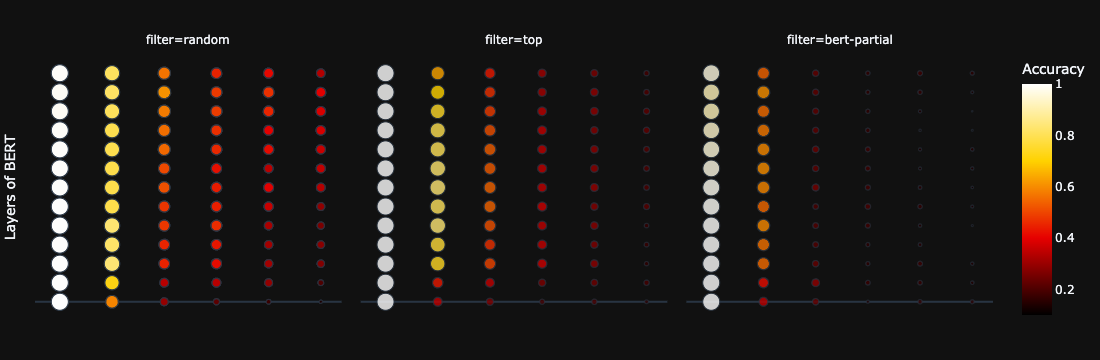

In [231]:
model = 'BERT'
fp = '/atlas/u/pkalluri/bert-vis/big-data/bert/bert-base-cased/probes/probe_identity.csv'
required_note = 'n_types=10'
vis(pd.read_csv(fp), model, required_note, save=False)

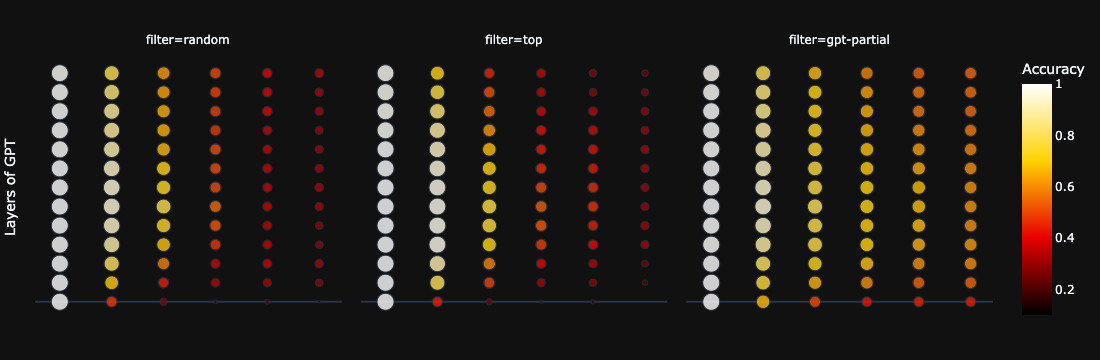

In [232]:
model = 'GPT'
fp = '/atlas/u/pkalluri/bert-vis/big-data/gpt/gpt2/probes/probe_identity.csv'
required_note = 'n_types=10'
vis(pd.read_csv(fp), model, required_note, save=True)

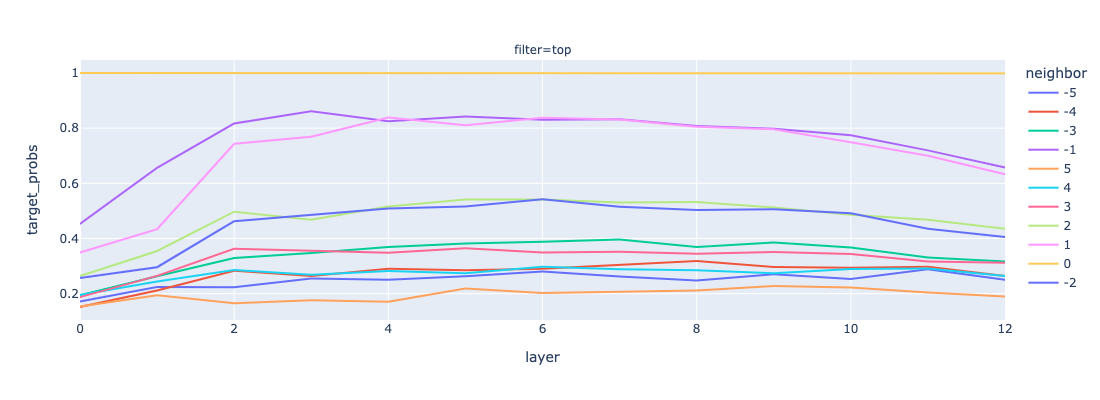

In [228]:
# Linear plot showing the two phases
scores = pd.read_csv(fp).sort_values(by='layer')
scores = scores[(scores['note'] == required_note) & (scores['filter']=='top')]
px.line(scores, x='layer', y='target_probs', color='neighbor', facet_col='filter', 
        width=400, height=400)